C:\Users\legen\AppData\Local\Temp\ipykernel_8484\2180620625.py:6: DtypeWarning: Columns (4,5,12,16,18,21,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  base_bundle = pd.read_csv('Base_bundle.csv')


Total Revenue for Black/Latinx-led Orgs: 4711085257.0
Total Revenue for Orgs with Reported Demographic Data: 29130588247.0
Total Revenue for All Non-profits in MA: 48123521722.0


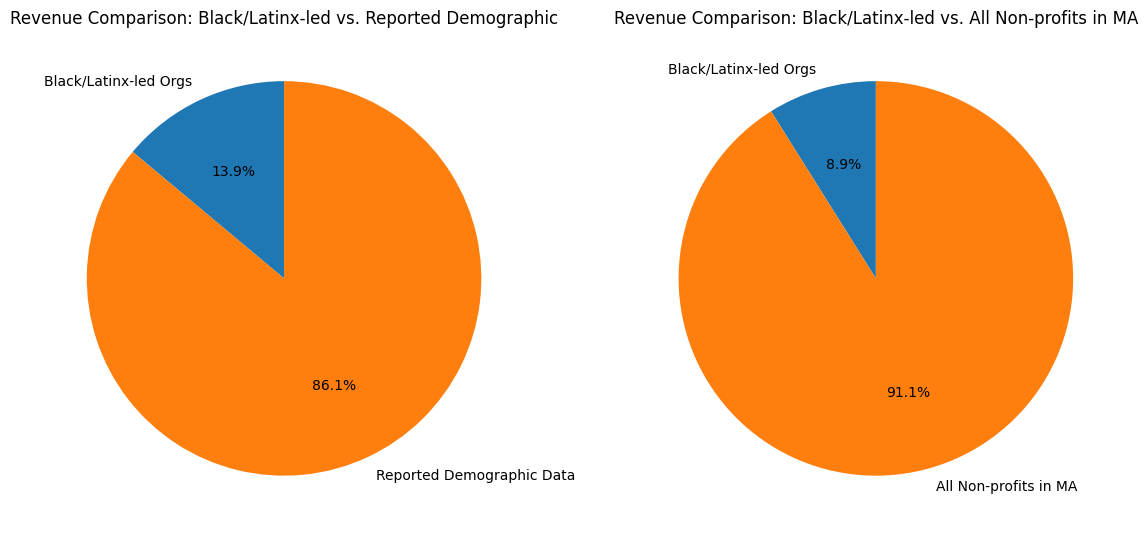

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('Demographics.csv')
base_bundle = pd.read_csv('Base_bundle.csv')

# Merge on a common column, assuming 'ein', and manage overlapping column names
merged_data = pd.merge(base_bundle, data, left_on='ein', right_on='Unnamed: 0', how='inner', suffixes=('_base', '_data'))

# Filter for reported race data
reported_race_data = merged_data[~merged_data['race_leader'].isna() & (merged_data['race_leader'] != 'Decline to state')]

# Filter for Black/Latinx-led organizations
black_latinx_led = reported_race_data[reported_race_data['race_leader'].str.contains('Black|Hispanic|Latino|Latina|Latinx', case=False, na=False)]

# Calculate revenues
revenue_black_latinx_led = black_latinx_led['total_revenue'].sum()
revenue_reported_demographic = reported_race_data['total_revenue'].sum()

# Filter for all non-profits in Massachusetts (MA) using the correct state code column
all_ma_nonprofits = merged_data[merged_data['state_code_base'] == 'MA']
revenue_all_ma_nonprofits = all_ma_nonprofits['total_revenue'].sum()

# Create comparisons
comparison1 = {
    "Black/Latinx-led Orgs": revenue_black_latinx_led,
    "Reported Demographic Data": revenue_reported_demographic
}
comparison2 = {
    "Black/Latinx-led Orgs": revenue_black_latinx_led,
    "All Non-profits in MA": revenue_all_ma_nonprofits
}

print("Total Revenue for Black/Latinx-led Orgs:", revenue_black_latinx_led)
print("Total Revenue for Orgs with Reported Demographic Data:", revenue_reported_demographic)
print("Total Revenue for All Non-profits in MA:", revenue_all_ma_nonprofits)

# Filter for all non-profits in Massachusetts (MA) using the correct state code column


# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.pie(comparison1.values(), labels=comparison1.keys(), autopct='%1.1f%%', startangle=90)
ax1.set_title('Revenue Comparison: Black/Latinx-led vs. Reported Demographic')
ax2.pie(comparison2.values(), labels=comparison2.keys(), autopct='%1.1f%%', startangle=90)
ax2.set_title('Revenue Comparison: Black/Latinx-led vs. All Non-profits in MA')

plt.show()